# Introduction

Embarking on a journey to understand the basics of SQL, this project revolves around analyzing the data of a DVD rental store. By diving into various facets of the store's operations, the project serves as a practical application of SQL queries and data analysis techniques. The goal is to develop a foundational understanding of SQL while extracting meaningful insights from real-world data.

For my analysis, I will respond to the following questions:

1. What is the proportion of films in each rating category (G, PG, PG-13, R, etc.) in our inventory?
2. Which film categories are most frequently rented by customers?
3. What is the average rental duration for each film category?
4. What are the trends in monthly rental revenue and sales for the past year?
5. How does the sales performance compare among different store locations?
6. What are the average film replacement costs across different genres?
7. Which actors appear in the most diverse range of movie genres?

By addressing these questions, I aim to practice and enhance my SQL skills, making the learning process both engaging and relevant to real-world scenarios.

# Analysis

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.options.display.max_rows = 40
pd.options.display.max_columns = None

In [3]:
db_path = "/kaggle/input/sqlite-sakila-sample-database/sqlite-sakila.db"

In [4]:
conn = sqlite3.connect(db_path)

In [5]:
# Displaying all the tables in the Sakila Database
tables = pd.read_sql("""

SELECT *
FROM sqlite_master
WHERE type = 'table';

""", conn)

tables

,type,name,tbl_name,rootpage,sql
0,table,actor,actor,2,CREATE TABLE actor (\n actor_id numeric NOT N...
1,table,country,country,5,CREATE TABLE country (\n country_id SMALLINT ...
2,table,city,city,7,"CREATE TABLE city (\n city_id int NOT NULL,\n..."
3,table,address,address,10,CREATE TABLE address (\n address_id int NOT N...
4,table,language,language,13,CREATE TABLE language (\n language_id SMALLIN...
5,table,category,category,15,CREATE TABLE category (\n category_id SMALLIN...
6,table,customer,customer,19,CREATE TABLE customer (\n customer_id INT NOT...
7,table,film,film,24,"CREATE TABLE film (\n film_id int NOT NULL,\n..."
8,table,film_actor,film_actor,28,CREATE TABLE film_actor (\n actor_id INT NOT ...
9,table,film_category,film_category,33,CREATE TABLE film_category (\n film_id INT NO...


## Film Ratings Distribution

In [6]:
query1 = """

SELECT rating, 
       COUNT(*) as count, 
       ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM film), 2) as percent
FROM film
GROUP BY rating;
"""
result1 = pd.read_sql_query(query1, conn)
result1

,rating,count,percent
0,G,178,17.8
1,NC-17,210,21.0
2,PG,194,19.4
3,PG-13,223,22.3
4,R,195,19.5


The database has a fairly balanced distribution of film ratings, catering to a wide range of audience preferences. The slightly higher percentage of PG-13 and NC-17 films suggests a focus on teenagers and adults, possibly reflecting customer demand or rental patterns. The presence of a significant number of G and PG-rated films shows that the database also caters to families and children.

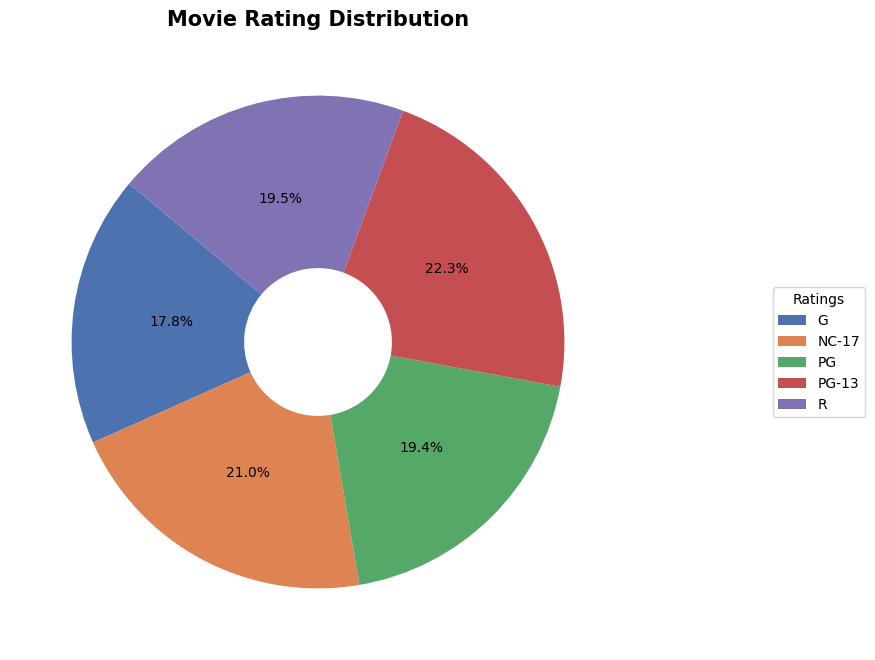

In [7]:
# Creating the pie chart
colors = sns.color_palette('deep')
#colors = plt.get_cmap('Set3')(range(len(result2)))
fig,ax = plt.subplots(figsize=(8,8))
ax.pie(result1['percent'], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=.7))
ax.legend(labels=result1['rating'], title="Ratings", bbox_to_anchor=(1.4,0.6), fontsize=10 )
ax.set_title('Movie Rating Distribution', fontsize=15, fontweight='bold')
plt.show()


In [8]:
fig2 = px.pie(result1, names='rating', values='percent', title='Movie Rating Distribution', hole=.3, color_discrete_sequence=px.colors.qualitative.Pastel)
fig2.show()

## Rental Film Category Popularity

In [9]:
query2 = """

SELECT c.name, COUNT(*) as count
FROM film as f

JOIN film_category as fc
ON f.film_id = fc.film_id

JOIN category as c
ON fc.category_id = c.category_id

JOIN inventory as i
ON f.film_id = i.film_id

JOIN rental as r
ON i.inventory_id = r.inventory_id

GROUP BY c.name
ORDER BY count desc
;
"""
result2 = pd.read_sql_query(query2, conn)
result2

,name,count
0,Sports,1179
1,Animation,1166
2,Action,1112
3,Sci-Fi,1101
4,Family,1096
5,Drama,1060
6,Documentary,1050
7,Foreign,1033
8,Games,969
9,Children,945


**Key Findings**:
- **Top Genres**: Sports (1179 rentals) and Animation (1166 rentals) are the most popular genres, indicating a strong customer preference for these types of films.
- **High Demand**: Action (1112 rentals) and Sci-Fi (1101 rentals) follow closely, suggesting a significant interest in high-energy and fantastical themes.
- **Family and Drama**: Both genres show a solid rental count (Family: 1096, Drama: 1060), reflecting their broad appeal.
- **Niche Genres**: Genres like Horror (846 rentals) and Travel (837 rentals) have lower but still notable rental numbers.

**Implications**:
- **Inventory Focus**: Stores should ensure a good stock of top genres while maintaining a diverse collection to cater to varied tastes.
- **Marketing Strategies**: Promotions can be targeted towards popular genres to attract more customers.
- **Future Acquisitions**: Preference trends should inform the acquisition of new titles, especially in top-performing genres.

This analysis reveals customer preferences and can guide business strategies in movie rental services.

In [10]:
query3 = """

SELECT c.name
FROM film as f

JOIN film_category as fc
ON f.film_id = fc.film_id

JOIN category as c
ON fc.category_id = c.category_id

JOIN inventory as i
ON f.film_id = i.film_id

JOIN rental as r
ON i.inventory_id = r.inventory_id

;
"""
result3 = pd.read_sql_query(query3, conn)
result3

,name
0,Documentary
1,Documentary
2,Documentary
3,Documentary
4,Documentary
...,...
16039,Comedy
16040,Comedy
16041,Comedy
16042,Comedy


In [11]:
cat = result3['name'].tolist()
cat_str = ' '.join(cat)

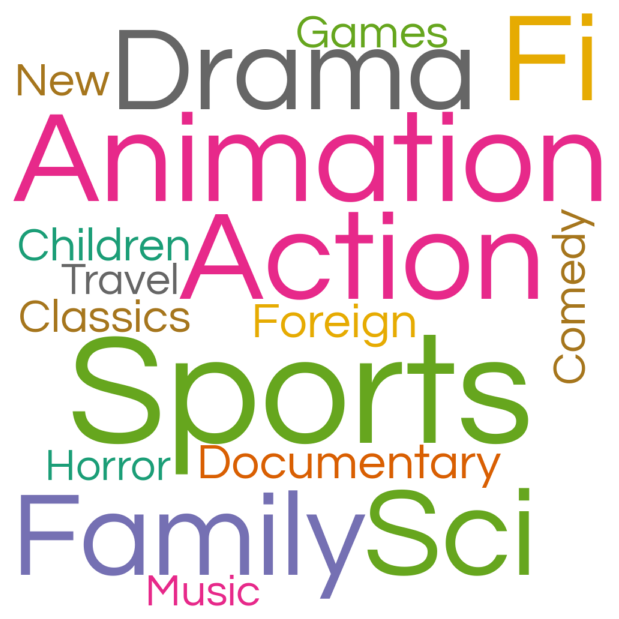

In [12]:
from wordcloud import WordCloud
wc = WordCloud(font_path='/kaggle/input/fontforwc/Questrial-Regular.ttf', collocations = False, width=1000, height=1000, background_color = "white", colormap = 'Dark2')
wc.generate(cat_str)

plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
#wc.to_file('cat_cloud.png')

## Average Rental Duration by Film Category

In [13]:
query4 = """

SELECT c.name as catName, AVG(rental_duration) as avgRentalDuration
FROM film as f
JOIN film_category as fc
JOIN category as c

ON fc.category_id = c.category_id
AND f.film_id = fc.film_id

GROUP BY c.name
ORDER BY avgRentalDuration desc
;
"""
result5 = pd.read_sql_query(query4, conn)
result5

,catName,avgRentalDuration
0,Travel,5.350877
1,Music,5.235294
2,Family,5.173913
3,Foreign,5.109589
4,Drama,5.080645
5,Classics,5.070175
6,Games,5.065574
7,Children,5.033333
8,Action,4.953125
9,Comedy,4.931034


**Key Findings:**
- **Longest Average Rentals**: Travel (5.35 days) and Music (5.24 days) genres have the highest average rental durations, indicating that customers prefer to keep these genres for longer periods.
- **Family and Foreign Films**: Both genres have an average rental duration above 5 days (Family: 5.17, Foreign: 5.11), suggesting their films are often rented for extended viewing.
- **Shorter Duration Genres**: Sports (4.72 days), despite being the most rented genre, has the shortest average rental duration, followed closely by the New genre (4.75 days).

## Monthly Rental Revenue and Sales

In [14]:
query5 = """

SELECT STRFTIME('%Y-%m', r.rental_date) as rental_byMonth, SUM(amount) as revenue, COUNT(*) as saleNumber
FROM payment as p
JOIN rental as r
ON p.rental_id = r.rental_id
GROUP BY STRFTIME('%Y-%m', r.rental_date)
ORDER BY STRFTIME('%Y-%m', r.rental_date) asc
;
"""
result5 = pd.read_sql_query(query5, conn)
result5

,rental_byMonth,revenue,saleNumber
0,2005-05,4823.44,1156
1,2005-06,9629.89,2311
2,2005-07,28368.91,6709
3,2005-08,24070.14,5686
4,2006-02,514.18,182


In [15]:
query6 = """

SELECT STRFTIME('%Y-%m', r.rental_date) as rental_byMonth, max(r.rental_date) as lastRentalDate
FROM payment as p
JOIN rental as r
ON p.rental_id = r.rental_id
WHERE rental_byMonth = '2006-02'
;
"""
result6 = pd.read_sql_query(query6, conn)
result6

,rental_byMonth,lastRentalDate
0,2006-02,2006-02-14 15:16:03.000


**Key Findings**:
- **Increasing Trend**: There's a clear increasing trend in both revenue and the number of sales from May 2005 to August 2005, with revenue peaking in July 2005 (28,368.91) alongside the highest number of sales (6709).
- **Peak Performance**: July 2005 stands out as the most successful month in terms of both revenue and sales.
- **Operational Pause or Shutdow**n: The business might have been temporarily closed during 09-2016 01-2006. This could be due to various reasons such as renovation, management change, or other operational reasons.
- **Significant Drop in 2006**: February 2006 shows a dramatic drop in both revenue (514.18) and sales numbers (182), indicating a significant decrease in rental activity.


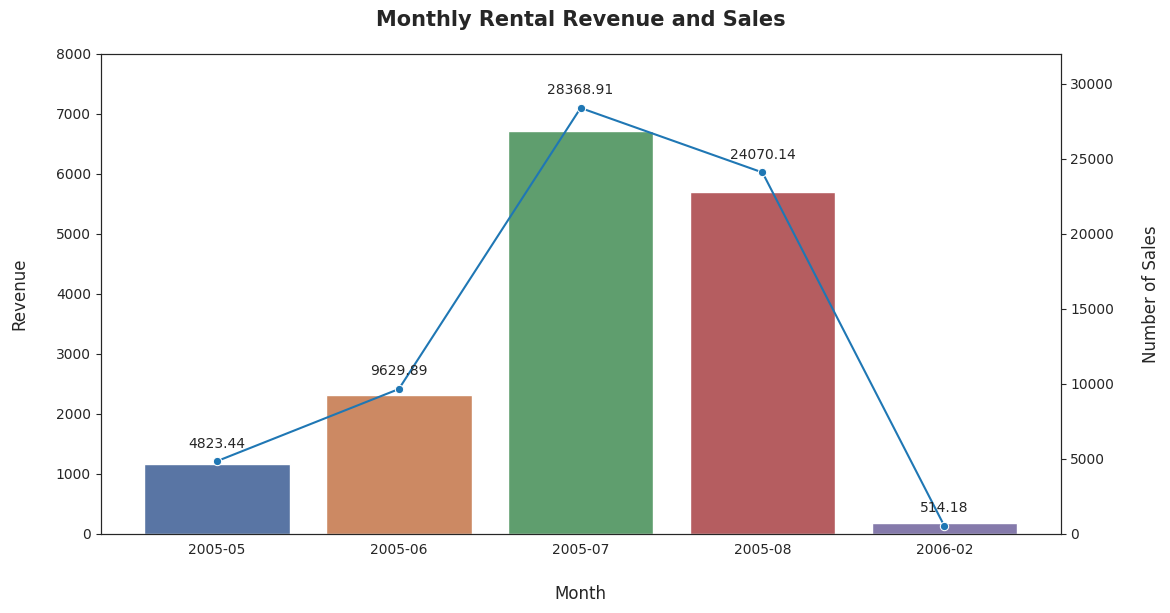

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style(style='white', rc=None)
colors = sns.color_palette('deep')

# Create a subplot
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the bar chart
sns.barplot(data=result5, x='rental_byMonth', y='saleNumber', ax=ax1, palette=colors)
y1_min, y1_max = 0, 8000
ax1.set_ylim(y1_min, y1_max)


ax2 = ax1.twinx()
y2_min, y2_max = 0, 32000 # New limits for the y2 axis
ax2.set_ylim(y2_min, y2_max)
# Plot the line chart
sns.lineplot(data=result5, x='rental_byMonth', y='revenue', marker='o', sort=False, ax=ax2)

# Annotate each point on the line chart
for i in range(result5.shape[0]):
    ax2.annotate(f'{result5.revenue.iloc[i]:.2f}', 
                 (result5.rental_byMonth.iloc[i], result5.revenue.iloc[i]),
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')

# Adjust the margins of the plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.title('Monthly Rental Revenue and Sales', fontweight='bold', fontsize=15, pad=20)
ax1.set_ylabel('Revenue', fontsize=12, labelpad=20)
ax2.set_ylabel('Number of Sales', fontsize=12, labelpad=20)
ax1.set_xlabel('Month', fontsize=12, labelpad=20)
plt.show()


## Sales Comparison by Store

In [17]:
query7 = """

SELECT s.store_id as store, SUM(amount) as revenue, COUNT(*) as saleNumber
FROM payment as p
JOIN rental as r
ON p.rental_id = r.rental_id

JOIN customer as c
ON p.customer_id = c.customer_id

JOIN store as s
ON s.store_id = c.store_id

GROUP BY s.store_id

;
"""
result7 = pd.read_sql_query(query7, conn)
result7

,store,revenue,saleNumber
0,1,36997.53,8747
1,2,30409.03,7297


**Key Findings**:
- **Store 1 Performance**: Store 1 has generated higher revenue (36,997.53) with a greater number of sales (8747) compared to Store 2.
- **Store 2 Performance**: While Store 2 has lower figures, with a total revenue of 30,409.03 and 7297 sales, it still represents a significant portion of the business.
- **Revenue and Sales Correlation**: There is a direct correlation between the number of sales and the revenue generated in each store, with higher sales numbers leading to higher revenue.

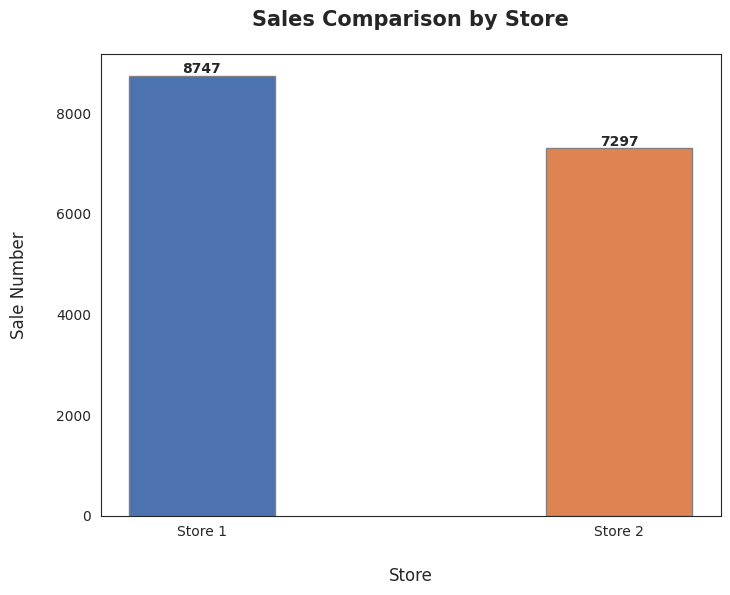

In [18]:
colors = sns.color_palette('deep')

# Set the positions of the bars on the x-axis
barWidth = 0.35
r1 = range(len(result7))

# Define pastel colors
pastel_colors = ['#ff9999','#66b3ff'] # Example pastel colors: light pink and light blue

# Create the bar chart with pastel colors
plt.figure(figsize=(8,6))
bars = plt.bar(r1, result7['saleNumber'], color=colors, width=barWidth, edgecolor='grey')

# Add labels to the graph
plt.xlabel('Store', fontsize=12, labelpad=20)
plt.xticks([r for r in range(len(result7))], ['Store 1', 'Store 2'])
plt.ylabel('Sale Number', fontsize=12, labelpad=20)
plt.title('Sales Comparison by Store', fontweight='bold', fontsize=15, pad=20)

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontweight='bold')

# Create legend & Show graphic
plt.show()


## Comparative Analysis of Film Replacement Costs Across Genres

In [19]:
query8 = """

SELECT c.name, f.replacement_cost
FROM film as f
JOIN film_category as fc
ON f.film_id = fc.film_id

JOIN category as c
ON fc.category_id = c.category_id
;
"""
result8 = pd.read_sql_query(query8, conn)
result8

,name,replacement_cost
0,Documentary,20.99
1,Horror,12.99
2,Documentary,18.99
3,Horror,26.99
4,Family,22.99
...,...,...
995,Documentary,9.99
996,Music,14.99
997,Horror,10.99
998,Children,28.99


In [20]:
px.box(result8, x="name", y="replacement_cost", notched=True, points="all", labels={"name": "Category Name", "replacement_cost": "Replacement Cost"}, title="Comparative Analysis of Film Replacement Costs Across Genres")

From the box plot, we can observe several points:

- The median replacement cost across most categories seems to be around the \$20 mark.
- There are visible outliers in nearly every category, with some replacement costs reaching up to \$30 or more, which are significantly higher than the median and even the upper quartile.

These observations can help a rental store manage inventory costs and understand the investment needed for different film categories. It might also influence pricing strategies for rentals and purchases, as well as decisions about which genres to stock more heavily based on the potential replacement costs.

## Versatility and Popularity of Actors Across Movie Genres

In [21]:
query9 = """

SELECT a.actor_id, a.first_name, a.last_name, COUNT(*) as appearance
FROM film as f
JOIN film_actor as fa
ON f.film_id = fa.film_id

JOIN actor as a
ON fa.actor_id = a.actor_id

GROUP BY a.actor_id
ORDER by appearance desc
;
"""
result9 = pd.read_sql_query(query9, conn)
result9

,actor_id,first_name,last_name,appearance
0,107,GINA,DEGENERES,42
1,102,WALTER,TORN,41
2,198,MARY,KEITEL,40
3,181,MATTHEW,CARREY,39
4,23,SANDRA,KILMER,37
...,...,...,...,...
195,31,SISSY,SOBIESKI,18
196,186,JULIA,ZELLWEGER,16
197,199,JULIA,FAWCETT,15
198,35,JUDY,DEAN,15


In [22]:
query10 = """

SELECT COUNT(DISTINCT name) as numCatTotal
FROM category
;
"""
result10 = pd.read_sql_query(query10, conn)
result10

,numCatTotal
0,16


In [23]:
query11 = """

SELECT a.actor_id, a.first_name, a.last_name, COUNT(*) as numMovieAppearance, COUNT(DISTINCT c.name) as numCatAppearance

FROM film as f
JOIN film_actor as fa 
JOIN actor as a
JOIN film_category as fc
JOIN category as c

ON f.film_id = fa.film_id
AND fa.actor_id = a.actor_id
AND f.film_id = fc.film_id
AND fc.category_id = c.category_id

GROUP BY a.actor_id
ORDER by numMovieAppearance desc

;
"""
result11 = pd.read_sql_query(query11, conn)
result11

,actor_id,first_name,last_name,numMovieAppearance,numCatAppearance
0,107,GINA,DEGENERES,42,16
1,102,WALTER,TORN,41,14
2,198,MARY,KEITEL,40,15
3,181,MATTHEW,CARREY,39,15
4,23,SANDRA,KILMER,37,15
...,...,...,...,...,...
195,31,SISSY,SOBIESKI,18,10
196,186,JULIA,ZELLWEGER,16,10
197,199,JULIA,FAWCETT,15,8
198,35,JUDY,DEAN,15,8


In [24]:
query12 = """

SELECT a.actor_id, a.first_name, a.last_name, COUNT(*) as numMovieAppearance, COUNT(DISTINCT c.name) as numCatAppearance

FROM film as f
JOIN film_actor as fa 
JOIN actor as a
JOIN film_category as fc
JOIN category as c

ON f.film_id = fa.film_id
AND fa.actor_id = a.actor_id
AND f.film_id = fc.film_id
AND fc.category_id = c.category_id

GROUP BY a.actor_id
HAVING numCatAppearance = (SELECT COUNT(DISTINCT name) as numCatTotal
FROM category)
ORDER by numMovieAppearance desc

;
"""
result12 = pd.read_sql_query(query12, conn)
result12

,actor_id,first_name,last_name,numMovieAppearance,numCatAppearance
0,107,GINA,DEGENERES,42,16
1,106,GROUCHO,DUNST,35,16
2,13,UMA,WOOD,35,16
3,197,REESE,WEST,33,16
4,139,EWAN,GOODING,33,16
5,127,KEVIN,GARLAND,33,16
6,161,HARVEY,HOPE,32,16
7,155,IAN,TANDY,31,16
8,95,DARYL,WAHLBERG,31,16
9,185,MICHAEL,BOLGER,30,16


GINA DEGENERES leads the list with 42 movie appearances across all 16 categories, suggesting she is the most versatile and possibly the most sought-after actor in this database.

# Conclusion

This project is not just about analyzing data but is primarily a step towards mastering the basics of SQL. The insights from the DVD rental store's data will serve as a backdrop for this learning journey, providing practical examples and applications of SQL queries and data analysis.